In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# ustawia domyślną wielkość wykresów
plt.rcParams['figure.figsize'] = (8,6)
# to samo, tylko dla tekstu
plt.rcParams['font.size'] = 16
# ustawia wielkość tekstów dla wykresów seaborn zależną od wielkości wykresu
sns.set_context('paper', font_scale=1.4)

In [29]:
data = pd.read_csv("students.csv", sep=",")

## Wstępna analiza

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math


In [6]:
data.shape

(1044, 34)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

Dataset zawiera 16 kolumn całkowitoliczbowych i 18 tekstowych, jednak z jego opisu wiadomo, że 8 z nich zawiera wartości yes/no, które w dalszej części analizy przekształcę na wartości liczbowe, aby mieć możliwość zbadania korelacji pomiędzy nimi a zmienną celu.

Liczba non-null wierszy jest równa całkowitej liczbie wierszy dla każdej kolumny, więc nie ma brakujących wartości.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.494253,0.911714,1.0,1.0,1.0,2.0,5.0


## Rozkłady zmiennych liczbowych

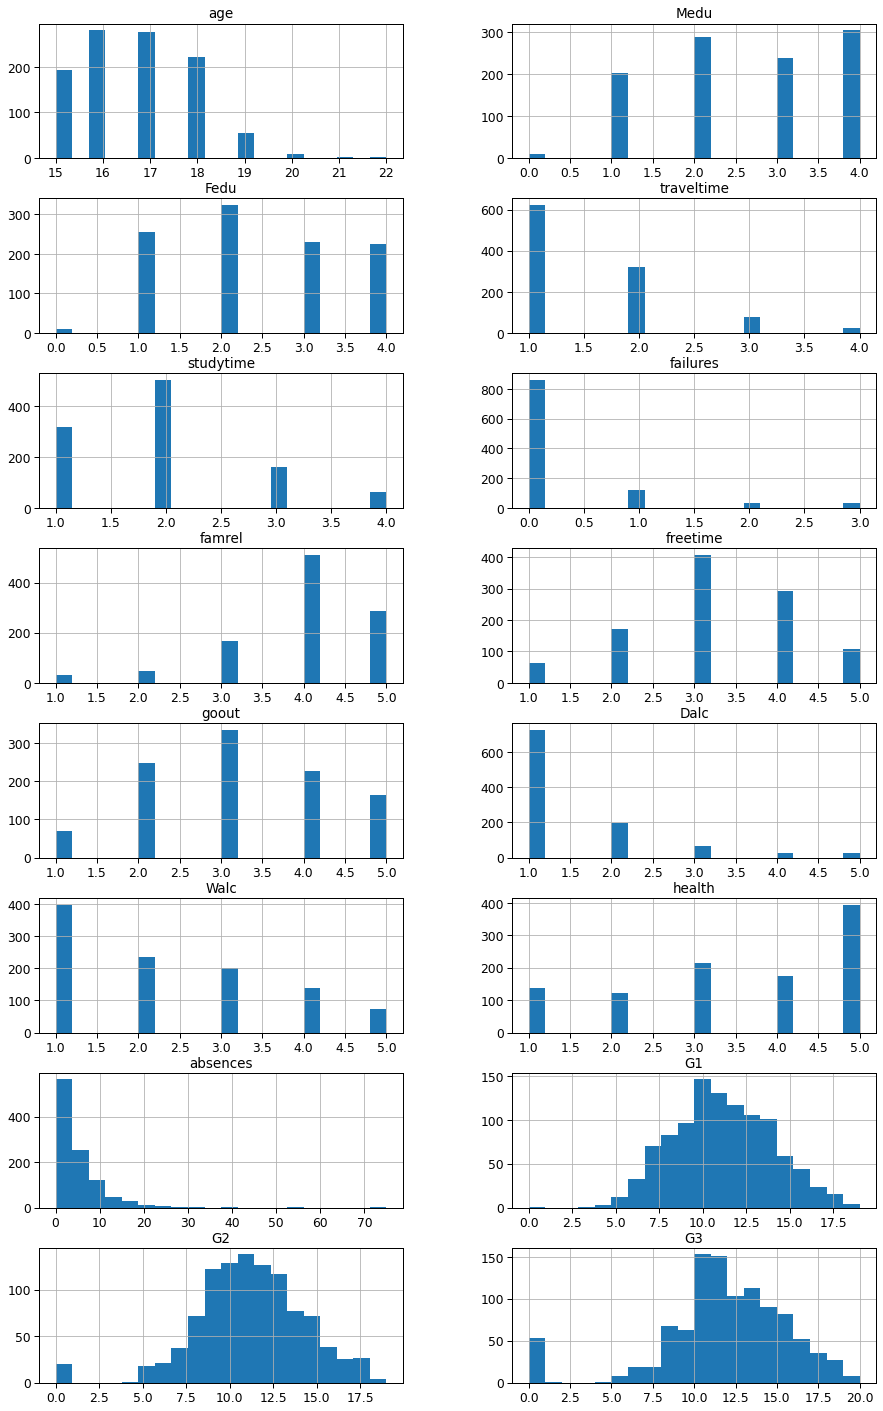

In [8]:
data.hist(bins = 20, figsize = (15,25), layout=(8,2))
plt.show()

In [37]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
numbers = data[numeric_columns]
numbers

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10
1040,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16
1041,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9
1042,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10


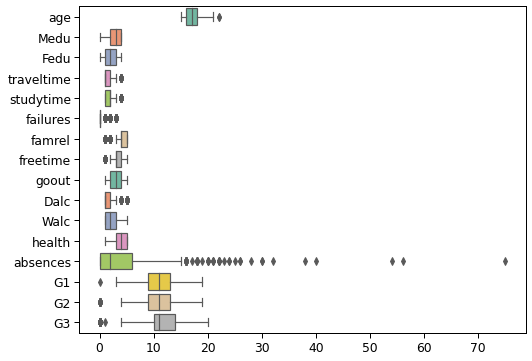

In [48]:
ax = sns.boxplot(data=numbers, orient="h", palette="Set2")

Jak widać na wykresie, zmienna absences ma bardzo skośny rozkład, więc gdybyśmy chcieli ją wykorzystać, należałoby poddać ją jakiejś transformacji, przykładowo logarytmicznej. Ma też dużo outlierów, w szczególności także znacząco większe od reszty wartości, które być może należałoby usunąć, aby nie wpłynęły w negatywny sposób na wynikowy model.

## Macierz korelacji

<AxesSubplot:>

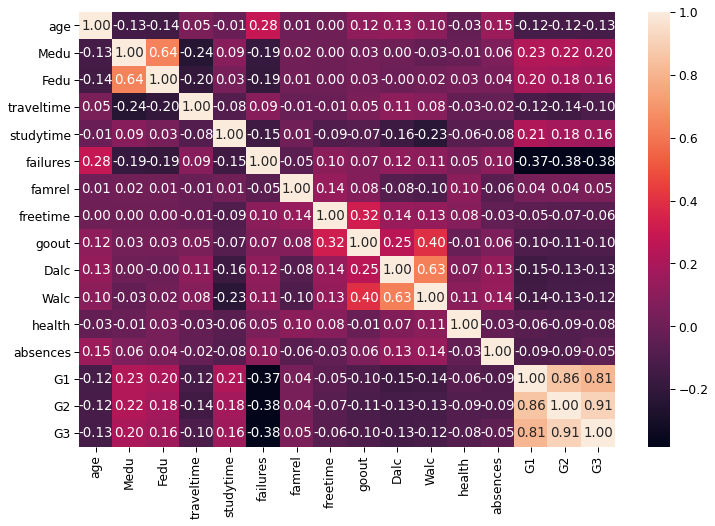

In [9]:
plt.figure(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".2f")

Najbardziej skorelowane są między sobą zmienne `G1`, `G2` i `G3`. Oprócz tego widać mocną korelację między zmiennymi `Dalc` i `Walc`, `Fedu` i `Medu` oraz `goout` i `Walc`, `Dalc` oraz `freetime`. Słabsza, choć wciąż zauważalna korelacja ujemna występuje pomiędzy zmienną failures i każdą z `G1`, `G2`, `G3`. Ostatnią ze zmiennych o korelacji o wartości bezwzględnej $\ge$ 0.25 jest korelacja pomiędzy zmiennymi `age` i `failures`.

Korelacja pomiędzy `G1` i `G2` a `G3` jest na tyle duża, że wpływ pozostałych zmiennych na modelowanie `G3` prawdopodobnie byłby bliski pomijalnemu.

## Analiza wpływu zmiennych binarnych

In [24]:
binaries = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
new_data = copy.deepcopy(data[binaries])
for column in new_data.columns:
    new_data[column] = new_data[column].map(dict(yes=1, no=0))
new_data['G3'] = data['G3']
new_data

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,G3
0,1,0,0,0,1,1,0,0,6
1,0,1,0,0,0,1,1,0,6
2,1,0,1,0,1,1,1,0,10
3,0,1,1,1,1,1,1,1,15
4,0,1,1,0,1,1,0,0,10
...,...,...,...,...,...,...,...,...,...
1039,0,0,0,1,0,1,1,0,10
1040,0,1,0,0,1,1,1,0,16
1041,0,0,0,1,1,1,0,0,9
1042,0,0,0,0,0,1,1,0,10


<AxesSubplot:>

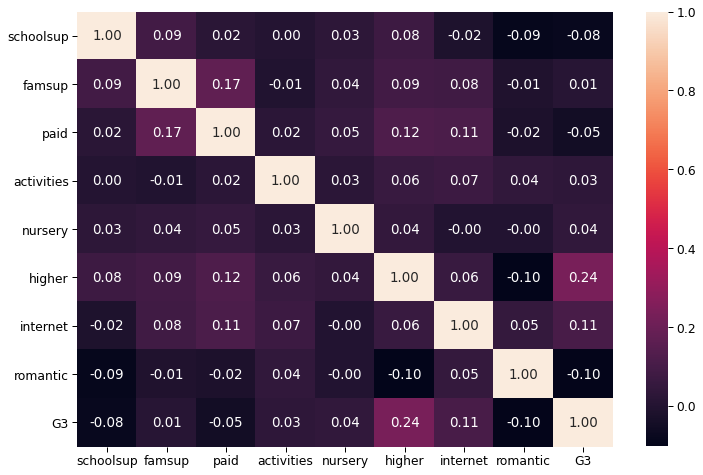

In [25]:
plt.figure(figsize=(12,8))
corr = new_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".2f")

In [35]:
new_data.groupby('higher').count()

,schoolsup,famsup,paid,activities,nursery,internet,romantic,G3
higher,,,,,,,,
0,89,89,89,89,89,89,89,89
1,955,955,955,955,955,955,955,955


Z powyższej macierzy korelacji wynika, że jedynie zmienna `higher` ma jakkolwiek znaczącą korelację z zmienną `G3`, więc być może należałoby zwrócić na nią uwagę. Jednocześnie, ponad 91% rekordów ma wartość 1 w kolumnie `higher`, co być może również wpływa na jej użyteczność.